In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")

In [2]:
invoice_df=pd.read_csv("../data/raw/final_csv/invoice.csv",index_col=0)

In [3]:
pincode_df=pd.read_csv("../data/external/Pincode_30052019.csv",index_col=0,encoding ="ISO-8859-1")

In [4]:
pincode_df.head(10)
print(pincode_df.loc[pincode_df['District']=='MUMBAI',:].head(10))

                      Region Name              Division Name  \
Circle Name                                                    
Maharashtra Circle  Mumbai Region  Mumbai City East Division   
Maharashtra Circle  Mumbai Region  Mumbai City East Division   
Maharashtra Circle  Mumbai Region  Mumbai City East Division   
Maharashtra Circle  Mumbai Region  Mumbai City East Division   
Maharashtra Circle  Mumbai Region  Mumbai City East Division   
Maharashtra Circle  Mumbai Region  Mumbai City East Division   
Maharashtra Circle  Mumbai Region  Mumbai City East Division   
Maharashtra Circle  Mumbai Region  Mumbai City East Division   
Maharashtra Circle  Mumbai Region  Mumbai City East Division   
Maharashtra Circle  Mumbai Region  Mumbai City East Division   

                                Office Name  Pincode OfficeType      Delivery  \
Circle Name                                                                     
Maharashtra Circle           Antop Hill S.O   400037         SO      

In [5]:
pincode_df.isnull().sum()

Region Name      33512
Division Name        0
Office Name          0
Pincode              0
OfficeType           0
Delivery             0
District            74
StateName            0
dtype: int64

In [6]:
aggregations_pincode={
    'StateName' : {'StateName_pincode_df': 'unique'},
    'District' : {'District_pincode_df': 'unique'},
    'Office Name' : {'Office_Name_pincode_df': lambda x:str(list(x)).strip('[]')}

}

pincode_df_grp=pincode_df.groupby('Pincode')['StateName','District','Office Name'].agg(aggregations_pincode).reset_index()

In [7]:
pincode_df_grp['StateName_pincode_df']=pincode_df_grp['StateName_pincode_df'].apply(lambda x:str(x).strip('[]').replace("'",""))
pincode_df_grp['District_pincode_df']=pincode_df_grp['District_pincode_df'].apply(lambda x:str(x).strip('[]').replace("'",""))

In [8]:
pincode_df_grp.head(5)

,Pincode,StateName_pincode_df,District_pincode_df,Office_Name_pincode_df
0,110001,Delhi,CENTRAL DELHI,"'Baroda House SO', 'Bengali Market SO', 'Bhaga..."
1,110002,Delhi,CENTRAL DELHI New Delhi,"'AGCR EXTENSION COUNTER', 'AGCR SO', 'Ajmeri G..."
2,110003,Delhi,CENTRAL DELHI SOUTH DELHI,"'Delhi High Court Extension Counter SO', 'Delh..."
3,110004,Delhi,CENTRAL DELHI,'Rashtrapati Bhawan SO'
4,110005,Delhi,CENTRAL DELHI,"'Anand Parbat Indl Area SO', 'Anand Parbat SO'..."


In [9]:
len(pincode_df_grp['Pincode'].unique())/len(pincode_df_grp) ## all unique pin-codes

1.0

In [10]:
invoice_df.head(5)

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Nashik,NaN,NaN,Retail,E14006,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000011,17:04:33,101,2012-04-02,15:15:31,80440,420.09,HYUNDAI,0.00,SANTRO,7000000011.00,0.00,Running Repairs,0.00,0.00,422000,BC03,NASHIK,NaN,NO,0.00,MH15BN2714,0.00,0.00,0.00,0.00,nan,0.00,NaN,420.09,0.00,0.00,0.00,0.00,420.09,GOLIVE
1,0.00,0.00,NaN,0.00,0.00,0.00,0.00,THANE,NaN,NaN,Retail,0000000017,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000014,17:26:52,105,2012-04-02,16:13:11,98474,179.75,MAHINDRA & MAHINDRA,0.00,LOGAN P,7000000014.00,0.00,Running Repairs,0.00,0.00,401107,BC01,THANE,NaN,NO,0.00,MH04DN6210,0.00,0.00,0.00,0.00,nan,0.00,NaN,179.75,0.00,0.00,0.00,0.00,179.75,GOLIVE
2,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Hyderabad,NaN,NaN,Retail,0000000007,Andhra Pradesh,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000016,17:44:03,6,2012-04-02,12:47:59,137832,1340.37,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,7000000016.00,0.00,Paid Service,0.00,0.00,500038,BC04,BALANAGAR,NaN,NO,0.00,AP11AB0153,0.00,0.00,0.00,0.00,nan,0.00,NaN,1340.37,0.00,0.00,0.00,0.00,1340.37,GOLIVE
3,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Hyderabad,NaN,NaN,Retail,E22364,Andhra Pradesh,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000026,20:04:51,24,2012-04-01,16:19:32,75627,1709.06,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,7000000026.00,480.02,Paid Service,0.00,3317.37,500023,BC04,BALANAGAR,NaN,NO,0.00,AP9BJ4847,0.00,0.00,0.00,0.00,nan,0.00,4302339,5506.45,0.00,0.00,0.00,0.00,5506.45,GOLIVE
4,0.00,0.00,NaN,0.00,0.00,0.00,0.00,Hyderabad,NaN,NaN,Retail,E25218,Andhra Pradesh,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2012-04-02,7000000027,20:24:21,23,2012-04-01,16:19:32,1,2074.88,TATA MOTORS,0.00,INDICA,7000000027.00,0.00,Accidental,0.00,3105.67,500045,BC04,BALANAGAR,NaN,NO,0.00,AP29BB4586,0.00,0.00,0.00,0.00,nan,0.00,4302337,5180.55,0.00,0.00,0.00,0.00,5180.55,GOLIVE


In [11]:
invoice_df.rename({'Pin code':'Pincode'},inplace=True,axis=1)

In [12]:
invoice_df=pd.merge(invoice_df,pincode_df_grp,how='left',on='Pincode')

In [13]:
invoice_df.tail(5)

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pincode,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,StateName_pincode_df,District_pincode_df,Office_Name_pincode_df
984736,0.00,0.00,NELLORE,0.00,0.00,0.00,0.00,NELLORE,CASH,NaN,Retail,0000020038,Andhra Pradesh,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2013-12-31,7000076034,20:14:46,41999,2013-07-22,15:46:55,29511,0.00,GENERAL MOTORS,0.00,SPARK,7000076034.00,30300.06,Accidental,0.00,52494.94,524001,BC17,NELLORE,NaN,NO,0.00,AP26AF1882,0.00,0.00,0.00,0.00,nan,0.00,"SRINU,NAGARAJU",82795.00,0.00,0.00,0.00,0.00,82795.00,BC17SA1,Andhra Pradesh,NELLORE,"'Nellore Bazar S.O', 'Nellore H.O', 'Pogathota..."
984737,0.00,0.00,WADAKI,0.00,0.00,0.00,0.00,PUNE,CASH,NaN,Retail,0000028103,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2013-12-31,7000076035,20:27:44,68563,2013-12-02,14:13:58,238873,0.00,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,7000076035.00,19999.87,Accidental,0.00,47358.04,411038,BC19,HADAPSAR - PUNE,NaN,NO,0.00,MH06AB5888,0.00,0.00,0.00,0.00,nan,0.00,yusuf,67357.91,0.00,0.00,0.00,0.00,67357.91,BC19FS1,Maharashtra,PUNE,"'Bhusari Colony S.O', 'Ex. Serviceman Colony S..."
984738,0.00,0.00,PUNE,0.00,0.00,0.00,0.00,PUNE,NaN,NaN,Retail,0000039665,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2013-12-31,7000076036,20:46:44,76055,2013-12-30,12:40:38,126260,1079.92,MAHINDRA & MAHINDRA,99.99,SCORPIO CRDE,7000076036.00,0.00,Running Repairs,0.00,5418.83,411021,BC02,PUNE,NaN,NO,0.00,MH12BP6316,0.00,0.00,0.00,0.00,nan,0.00,SAJID,6598.74,0.00,0.00,0.00,0.00,6598.74,BC02SA2,Maharashtra,PUNE,"'Armament S.O', 'Bavdhan B.O', 'Sus B.O'"
984739,0.00,0.00,VADAPALANI,0.00,0.00,0.00,0.00,CHENNAI,NaN,NaN,Retail,0000017030,Tamil Nadu,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2013-12-31,7000076037,20:47:20,75125,2013-12-27,11:54:42,109684,8131.97,MAHINDRA & MAHINDRA,0.00,SCORPIO CRDE,7000076037.00,0.00,Paid Service,0.00,25288.98,600093,BC06,GUINDY,NaN,NO,0.00,TN51T1198,0.00,0.00,0.00,0.00,nan,0.00,Sivakumar,33420.95,0.00,0.00,0.00,0.00,33420.95,BC06SA2,Tamil Nadu,CHENNAI,'Saligramam S.O'
984740,0.00,0.00,SHIVANE,0.00,0.00,0.00,0.00,PUNE,NaN,NaN,Retail,0000012969,Maharashtra,NaN,NaN,00:00:00,0.00,0.00,0.00,0.00,NaN,2013-12-31,7000076038,20:47:23,76272,2013-12-31,10:06:36,68321,1349.14,MAHINDRA & MAHINDRA,200.02,XYLO,7000076038.00,0.00,Running Repairs,0.00,3029.71,411023,BC02,PUNE,NaN,NO,0.00,MH12FK2886,0.00,0.00,0.00,0.00,nan,0.00,sajid,4578.87,0.00,0.00,0.00,0.00,4578.87,BC02SA2,Maharashtra,PUNE,"'Kudje B.O', 'Mandvi BK B.O', 'N.D.A. Khadakwa..."


In [14]:
perc_missing_invoice_df=(invoice_df.isnull().sum()*100)/len(invoice_df)
print(perc_missing_invoice_df)

Amt Rcvd From Custom      70.04
Amt Rcvd From Ins Co      70.04
Area / Locality            2.96
CGST(14%)                 70.04
CGST(2.5%)                70.04
CGST(6%)                  70.04
CGST(9%)                  70.04
CITY                       0.00
Cash /Cashless Type       97.22
Claim No.                 99.51
Cust Type                  0.00
Customer No.               0.00
District                   0.00
Expiry Date               90.11
Gate Pass Date            95.31
Gate Pass Time             0.00
IGST(12%)                 70.04
IGST(18%)                 70.04
IGST(28%)                 70.04
IGST(5%)                  70.04
Insurance Company         90.05
Invoice Date               0.00
Invoice No                 0.00
Invoice Time               0.00
Job Card No                0.00
JobCard Date               0.00
JobCard Time               0.00
KMs Reading                0.00
Labour Total               0.00
Make                       0.00
                          ...  
Model   

In [15]:
print(len(invoice_df.loc[invoice_df['StateName_pincode_df'].isnull()==True,:])) ## 79210 missing states
print(invoice_df.loc[(invoice_df['StateName_pincode_df'].isnull()==True)&(invoice_df['District']=='Maharashtra'),['Pincode','CITY','District']])

79210
        Pincode         CITY     District
0        422000       Nashik  Maharashtra
11       420001     igatpuri  Maharashtra
16       422000       Nashik  Maharashtra
20       422000       Nashik  Maharashtra
26       422000       Nashik  Maharashtra
29       422000       Nashik  Maharashtra
31       420010        NASIK  Maharashtra
32       422000       Nashik  Maharashtra
39       422000       Nashik  Maharashtra
48       422000       Nashik  Maharashtra
50       422000       Nashik  Maharashtra
53       422000       Nashik  Maharashtra
58       110000        Delhi  Maharashtra
67       422000       Nashik  Maharashtra
75       422000       Nashik  Maharashtra
81       422000       Nashik  Maharashtra
82       411056         Pune  Maharashtra
89       411056         Pune  Maharashtra
93       422000       Nashik  Maharashtra
98       422000       Nashik  Maharashtra
102      422200       Nashik  Maharashtra
111      422000       Nashik  Maharashtra
113      422000       Nashik

In [16]:
print('unique pincodes with missing states')
print(len(invoice_df.loc[invoice_df['StateName_pincode_df'].isnull()==True,['Pincode']]))

unique pincodes with missing states
79210


In [17]:
print(len(invoice_df['Invoice No'].unique())) #invoice no is unique
print(len(invoice_df['Invoice No'])) 
print(len(invoice_df['Job Card No'].unique()))

984741
984741
973578


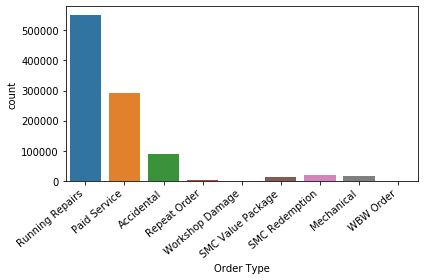

In [18]:
ax=sns.countplot(invoice_df['Order Type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## not missing - 'Order Type' , 'Parts Total' , 'CITY' , 'Model' , 'Make' , 'Labour Total' , 'Misc Total','OSL Total'  

In [19]:
invoice_df['Model'].value_counts().head(5)

SWIFT           64953
ALTO            59196
SCORPIO CRDE    46449
WAGONR          44797
BOLERO          44517
Name: Model, dtype: int64

In [20]:
## Swift most serviced model

In [21]:
print(invoice_df.loc[(invoice_df['CITY']=='nashik')&(invoice_df['District']!='Maharashtra'),['District','CITY','Pincode','Regn No']].head(10))
print('\n')
print('mismatched city mumbai with another state')
print(len(invoice_df.loc[(invoice_df['CITY']=='nashik')&(invoice_df['District']!='Maharashtra'),['District','CITY','Pincode','Regn No']]))

          District    CITY  Pincode     Regn No
282330     Gujarat  nashik   400002  MH15AS9985
351138  Tamil Nadu  nashik   422009  TN38AS1823
803403  Tamil Nadu  nashik   422009  TN38AS1823
864259     Gujarat  nashik   400002  MH15AS9985
864537     Gujarat  nashik   400002  MH15AS9985
864538     Gujarat  nashik   400002  MH15AS9985
865606  Tamil Nadu  nashik   422009  TN38AS1823
895136  Tamil Nadu  nashik   422009  TN38AS1823
901183  Tamil Nadu  nashik   422009  TN38AS1823
910714  Tamil Nadu  nashik   422009  TN38AS1823


mismatched city mumbai with another state
12


In [22]:
invoice_df['Make'].value_counts().head(5)

MARUTI SUZUKI           308784
MAHINDRA &  MAHINDRA    185803
HYUNDAI                 157242
TATA MOTORS             104688
GENERAL MOTORS           52243
Name: Make, dtype: int64

In [23]:
## Maruti Suzuki most serviced Car Brand

In [24]:
print(invoice_df.loc[:,['Parts Total','Misc Total','OSL Total','Labour Total']].head(10))

   Parts Total  Misc Total  OSL Total  Labour Total
0         0.00        0.00       0.00        420.09
1         0.00        0.00       0.00        179.75
2         0.00        0.00       0.00       1340.37
3      3317.37        0.00     480.02       1709.06
4      3105.67        0.00       0.00       2074.88
5      1013.87        0.00       0.00        599.10
6       789.58        0.00       0.00        598.87
7       774.67        0.00       0.00        598.96
8      2106.92        0.00       0.00        200.02
9         9.73        0.00       0.00        599.70


In [25]:
invoice_df['Overall_total_my_verify']=invoice_df['Parts Total']+invoice_df['Misc Total']+invoice_df['OSL Total']+invoice_df['Labour Total']

In [26]:
invoice_df.loc[:,['Overall_total_my_verify','Total Value']].tail(20)
#the addition of the individual values equals Total Value
# we don't need the individual columns just need the column 'Overall_total_my_verify'

,Overall_total_my_verify,Total Value
984721,3971.87,3971.87
984722,2669.99,2669.99
984723,7273.90,7273.90
984724,28971.29,28971.29
984725,0.00,0.00
984726,3400.36,3400.36
984727,38055.02,38055.02
984728,0.00,0.00
984729,5267.05,5267.05
984730,2368.23,2368.23


In [27]:
aggregations_state={
    'Customer No.': {'unique_customers':'nunique'},
    'Overall_total_my_verify' : {'Overall_total_value_statewise':'sum'},
    #'Plant' : {'unique_plants':'nunique'},
    'Make' : {'unique_brands' : 'nunique'},
    'Model' : {'unique_models' : 'nunique'}
}


invoice_grp_state_revenue=invoice_df.groupby('StateName_pincode_df')['Customer No.','Overall_total_my_verify','Plant','Make','Model'].agg(aggregations_state).reset_index()
invoice_grp_state_revenue['Average_Revenue_statewise_per_customer']=invoice_grp_state_revenue['Overall_total_value_statewise']/invoice_grp_state_revenue['unique_customers']
#invoice_grp_city_revenue['Average_Revenue_citywise_per_plant']=invoice_grp_city_revenue['Overall_total_value_citywise']/invoice_grp_city_revenue['unique_plants']
print(invoice_grp_state_revenue.sort_values(by=['Overall_total_value_statewise','Average_Revenue_statewise_per_customer'],ascending=False).head(10))

   StateName_pincode_df  unique_customers  Overall_total_value_statewise  \
40           Tamil Nadu             82439                   934667741.12   
26          Maharashtra             81735                   651895325.06   
22            Karnataka             41524                   320668481.33   
37            Rajasthan             39108                   256425126.52   
44        Uttar Pradesh             35511                   231556643.18   
42            Telangana             22741                   214445211.35   
25       Madhya Pradesh             28273                   199466354.90   
15              Gujarat             21902                   171713132.82   
0        Andhra Pradesh             18461                   147574479.07   
16              Haryana             16157                   115119864.88   

    unique_brands  unique_models  Average_Revenue_statewise_per_customer  
40             27            230                                11337.69  
26           

In [28]:
## after groupby rows with missing StateName_pincode_df is removed

In [29]:
invoice_df['Cust Type'].value_counts()

Retail              977685
Insurance             3471
Fleets                2233
Corporate others       644
Corporate- M&M         311
MFCWL                  253
Franchise              140
Name: Cust Type, dtype: int64

In [30]:
invoice_df['Make'].value_counts().head(5)

MARUTI SUZUKI           308784
MAHINDRA &  MAHINDRA    185803
HYUNDAI                 157242
TATA MOTORS             104688
GENERAL MOTORS           52243
Name: Make, dtype: int64

In [31]:
len(invoice_df['Make'].unique())

28

In [32]:
invoice_df['Order Type'].value_counts().head(5)

Running Repairs    551857
Paid Service       291516
Accidental          88396
SMC Redemption      20038
Mechanical          15100
Name: Order Type, dtype: int64

In [33]:
invoice_df['Plant'].value_counts().head(5)

BC03    28615
BC07    14592
BC01    14483
BC05    13329
BC26    13261
Name: Plant, dtype: int64

In [34]:
invoice_df['Plant Name1'].value_counts().head(5)

NASHIK         28615
NERKUNDRAM     14592
THANE          14483
MADEENAGUDA    13329
NAGPUR         13261
Name: Plant Name1, dtype: int64

In [35]:
invoice_df['Invoice Date']=pd.to_datetime(invoice_df['Invoice Date'])

In [36]:
invoice_df.loc[:,['Invoice Date','Invoice Time','Gate Pass Time','JobCard Date','JobCard Time']].tail(20)

,Invoice Date,Invoice Time,Gate Pass Time,JobCard Date,JobCard Time
984721,2013-12-31,19:36:45,00:00:00,2013-12-31,10:29:59
984722,2013-12-31,19:37:51,00:00:00,2013-12-30,11:25:49
984723,2013-12-31,19:43:53,00:00:00,2013-12-06,10:06:00
984724,2013-12-31,19:47:31,00:00:00,2013-12-24,15:24:37
984725,2013-12-31,19:47:57,00:00:00,2013-12-28,16:45:09
984726,2013-12-31,19:48:33,00:00:00,2013-12-30,15:10:12
984727,2013-12-31,19:50:11,00:00:00,2013-12-17,12:40:31
984728,2013-12-31,19:50:55,00:00:00,2013-12-31,12:01:24
984729,2013-12-31,19:51:25,00:00:00,2013-12-30,13:37:46
984730,2013-12-31,19:55:17,00:00:00,2013-12-31,11:51:47


In [37]:
invoice_df['Invoice_Date_Time']=invoice_df['Invoice Date'].astype(str).str.cat(invoice_df[['Invoice Time']].astype(str),sep=' ')

In [38]:
invoice_df.loc[:,['Invoice_Date_Time','Invoice Date','Invoice Time']].head(5)

,Invoice_Date_Time,Invoice Date,Invoice Time
0,2012-04-02 17:04:33,2012-04-02,17:04:33
1,2012-04-02 17:26:52,2012-04-02,17:26:52
2,2012-04-02 17:44:03,2012-04-02,17:44:03
3,2012-04-02 20:04:51,2012-04-02,20:04:51
4,2012-04-02 20:24:21,2012-04-02,20:24:21


In [39]:
#pd.to_datetime(invoice_df['Invoice_Date_Time']).dt.hour.head(5)
invoice_df['Invoice_Date_Time']=pd.to_datetime(invoice_df['Invoice_Date_Time'])

In [40]:
invoice_df['JobCard_Date_Time']=invoice_df['JobCard Date'].astype(str).str.cat(invoice_df[['JobCard Time']].astype(str),sep=' ')

In [41]:
invoice_df.loc[:,['JobCard_Date_Time','JobCard Date','JobCard Time']].head(5)

,JobCard_Date_Time,JobCard Date,JobCard Time
0,2012-04-02 15:15:31,2012-04-02,15:15:31
1,2012-04-02 16:13:11,2012-04-02,16:13:11
2,2012-04-02 12:47:59,2012-04-02,12:47:59
3,2012-04-01 16:19:32,2012-04-01,16:19:32
4,2012-04-01 16:19:32,2012-04-01,16:19:32


In [42]:
invoice_df['JobCard_Date_Time']=pd.to_datetime(invoice_df['JobCard_Date_Time'])

In [43]:
invoice_df['Service_Time']=invoice_df['Invoice_Date_Time']-invoice_df['JobCard_Date_Time']

In [44]:
print(len(invoice_df.loc[invoice_df['Service_Time']<pd.Timedelta(hours=0),['Service_Time']]))

1


In [45]:
invoice_df.loc[invoice_df['Service_Time']<pd.Timedelta(hours=0),['Service_Time']]

,Service_Time
82622,-1 days +23:59:27


In [46]:
invoice_df['Service_Time'].describe()

count                     984741
mean      4 days 03:55:29.210504
std      13 days 18:22:45.664035
min            -1 days +23:59:27
25%              0 days 01:58:30
50%              0 days 07:37:36
75%              2 days 21:42:23
max           1112 days 03:19:12
Name: Service_Time, dtype: object

In [47]:
invoice_df_filtered=invoice_df.loc[invoice_df['Service_Time']>pd.Timedelta(hours=0),:]

In [48]:
invoice_df_filtered['Service_Time'].describe()

count                     984740
mean      4 days 03:55:29.575841
std      13 days 18:22:46.212680
min              0 days 00:00:36
25%              0 days 01:58:30
50%       0 days 07:37:36.500000
75%       2 days 21:42:23.500000
max           1112 days 03:19:12
Name: Service_Time, dtype: object

In [49]:
#invoice_df_filtered['Service_Time'].astype('timedelta64[h]').head(10)  gives hours

In [50]:
invoice_df_filtered['Service_Time'].head(5)

0   0 days 01:49:02
1   0 days 01:13:41
2   0 days 04:56:04
3   1 days 03:45:19
4   1 days 04:04:49
Name: Service_Time, dtype: timedelta64[ns]

In [51]:
(invoice_df_filtered['Service_Time']/pd.Timedelta(hours=1)).head()

0    1.82
1    1.23
2    4.93
3   27.76
4   28.08
Name: Service_Time, dtype: float64

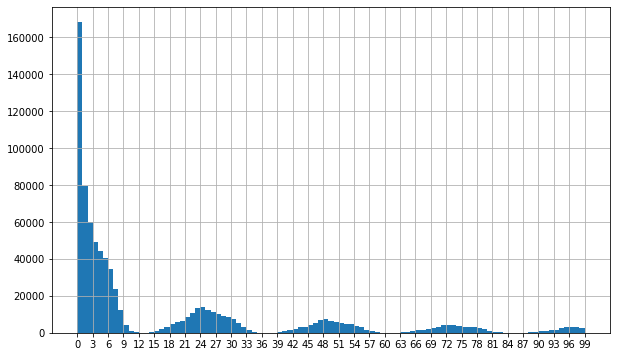

In [52]:
plt.figure(figsize=(10,6))
(invoice_df_filtered['Service_Time']/pd.Timedelta(hours=1)).hist(bins=range(0,100,1))
plt.xticks(np.arange(0,100, step=3))
plt.show()

In [53]:
invoice_df_filtered['Service_time_category']=None
invoice_df_filtered.loc[invoice_df_filtered['Service_Time']<pd.Timedelta(hours=13),'Service_time_category']='super_fast'
invoice_df_filtered.loc[(invoice_df_filtered['Service_Time']>=pd.Timedelta(hours=13))&(invoice_df_filtered['Service_Time']<pd.Timedelta(hours=36)),'Service_time_category']='fast'
invoice_df_filtered.loc[(invoice_df_filtered['Service_Time']>=pd.Timedelta(hours=36))&(invoice_df_filtered['Service_Time']<pd.Timedelta(hours=61)),'Service_time_category']='mid'
invoice_df_filtered.loc[(invoice_df_filtered['Service_Time']>=pd.Timedelta(hours=61))&(invoice_df_filtered['Service_Time']<pd.Timedelta(hours=84)),'Service_time_category']='slow'
invoice_df_filtered.loc[invoice_df_filtered['Service_Time']>=pd.Timedelta(hours=84),'Service_time_category']='super_slow'

In [54]:
invoice_df_filtered.loc[:,['Service_Time','Service_time_category']].head(10)

,Service_Time,Service_time_category
0,0 days 01:49:02,super_fast
1,0 days 01:13:41,super_fast
2,0 days 04:56:04,super_fast
3,1 days 03:45:19,fast
4,1 days 04:04:49,fast
5,1 days 16:51:21,mid
6,1 days 17:58:48,mid
7,1 days 18:09:09,mid
8,0 days 20:49:46,fast
9,1 days 18:41:45,mid


In [55]:
invoice_df_filtered['Service_Time_hrs']=(invoice_df_filtered['Service_Time']/pd.Timedelta(hours=1))

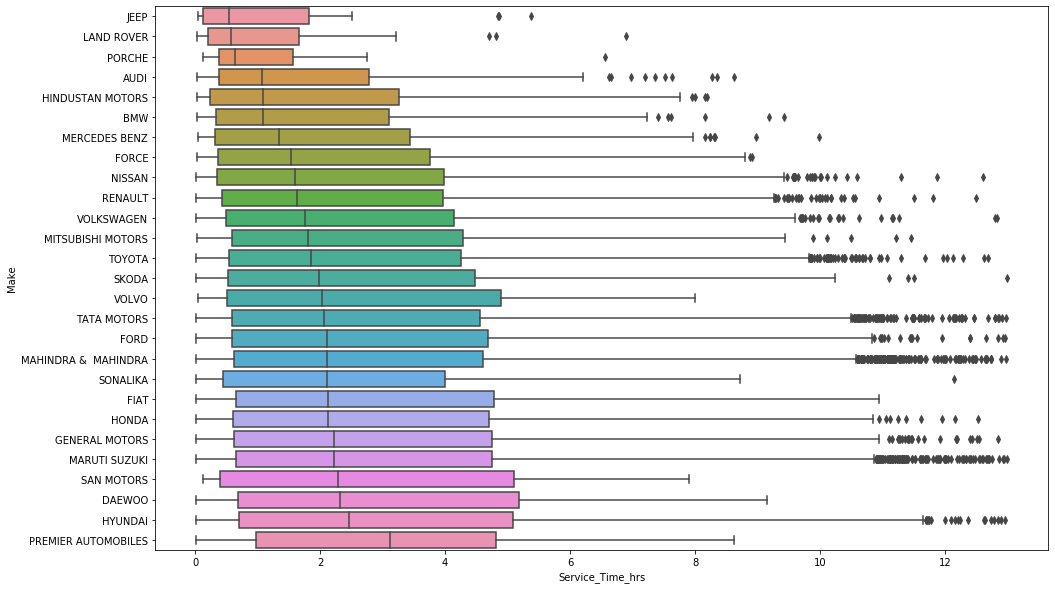

In [56]:
plt.figure(figsize=(16,10))
index_sorted_service_time=invoice_df_filtered.loc[invoice_df_filtered['Service_time_category']=='super_fast',:].groupby('Make')['Service_Time_hrs'].median().sort_values()
sns.boxplot(y='Make',x='Service_Time_hrs',data=invoice_df_filtered.loc[invoice_df_filtered['Service_time_category']=='super_fast',:],order=list(index_sorted_service_time.index))

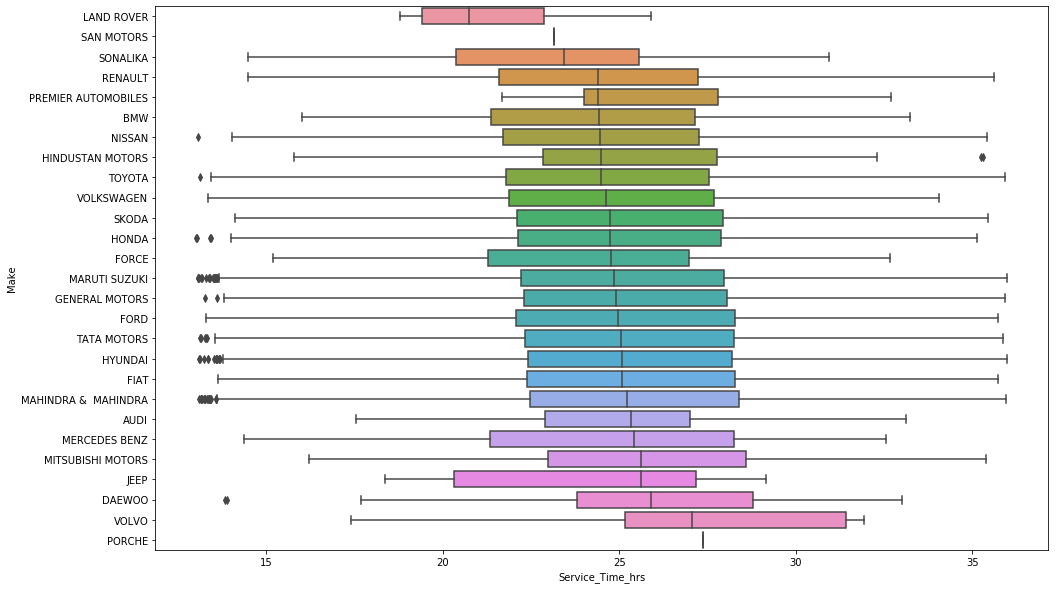

In [57]:
plt.figure(figsize=(16,10))
index_sorted_service_time=invoice_df_filtered.loc[invoice_df_filtered['Service_time_category']=='fast',:].groupby('Make')['Service_Time_hrs'].median().sort_values()
sns.boxplot(y='Make',x='Service_Time_hrs',data=invoice_df_filtered.loc[invoice_df_filtered['Service_time_category']=='fast',:],order=list(index_sorted_service_time.index))

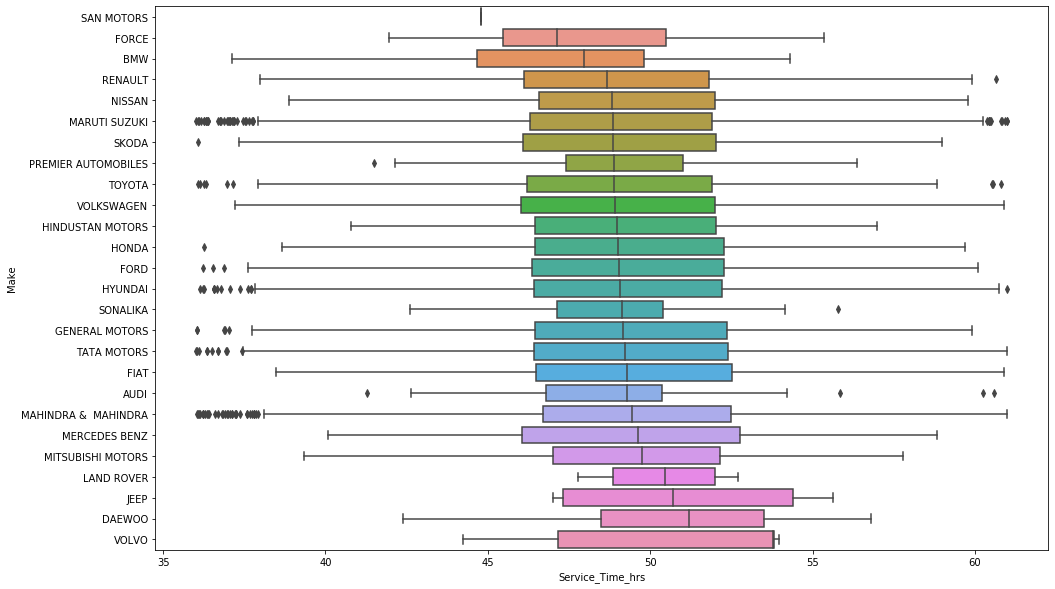

In [58]:
plt.figure(figsize=(16,10))
index_sorted_service_time=invoice_df_filtered.loc[invoice_df_filtered['Service_time_category']=='mid',:].groupby('Make')['Service_Time_hrs'].median().sort_values()
sns.boxplot(y='Make',x='Service_Time_hrs',data=invoice_df_filtered.loc[invoice_df_filtered['Service_time_category']=='mid',:],order=list(index_sorted_service_time.index))

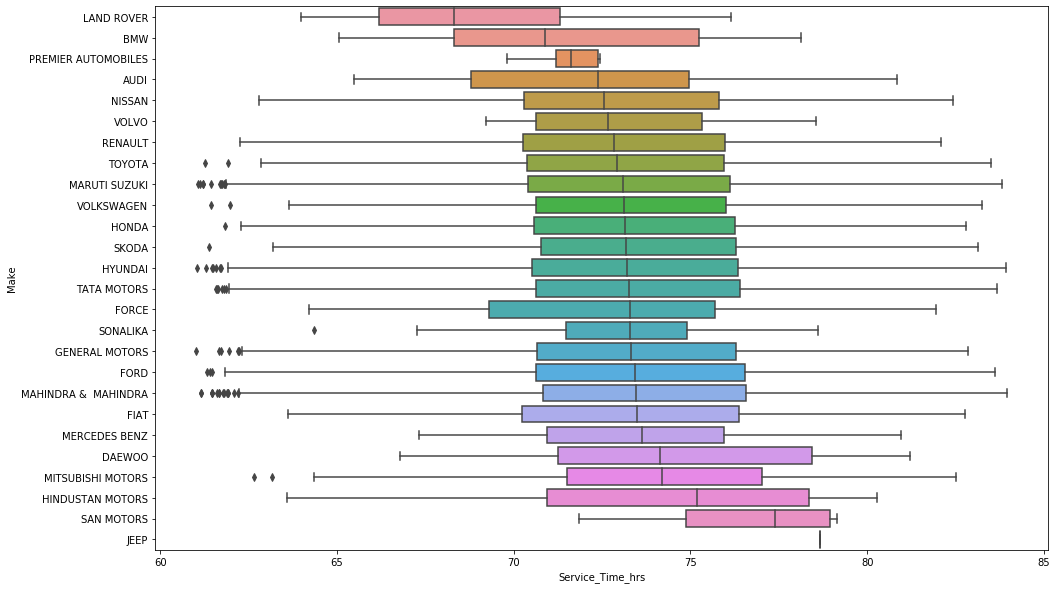

In [59]:
plt.figure(figsize=(16,10))
index_sorted_service_time=invoice_df_filtered.loc[invoice_df_filtered['Service_time_category']=='slow',:].groupby('Make')['Service_Time_hrs'].median().sort_values()
sns.boxplot(y='Make',x='Service_Time_hrs',data=invoice_df_filtered.loc[invoice_df_filtered['Service_time_category']=='slow',:],order=list(index_sorted_service_time.index))

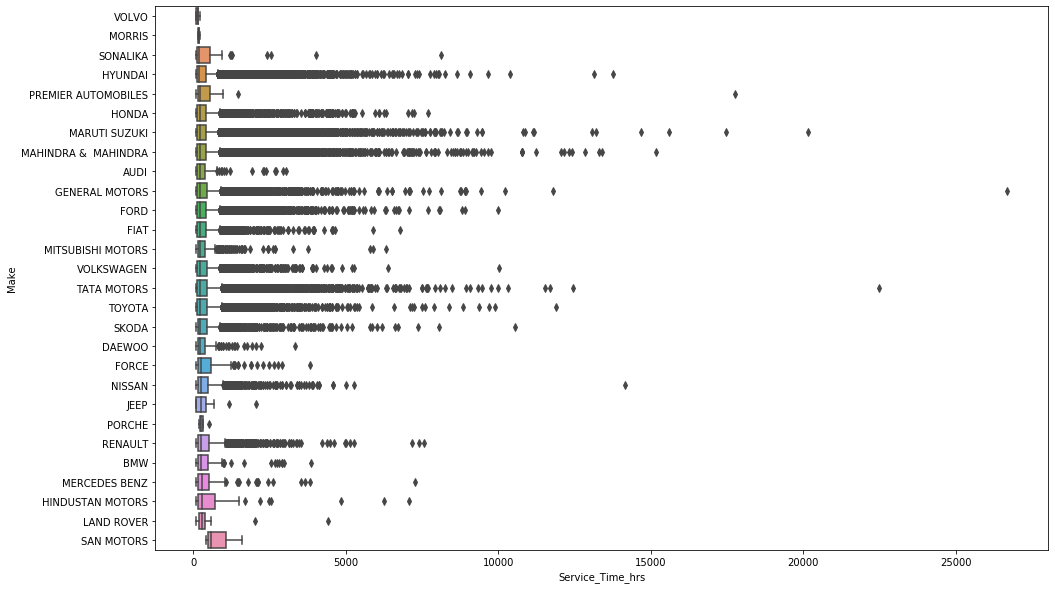

In [60]:
plt.figure(figsize=(16,10))
index_sorted_service_time=invoice_df_filtered.loc[invoice_df_filtered['Service_time_category']=='super_slow',:].groupby('Make')['Service_Time_hrs'].median().sort_values()
sns.boxplot(y='Make',x='Service_Time_hrs',data=invoice_df_filtered.loc[invoice_df_filtered['Service_time_category']=='super_slow',:],order=list(index_sorted_service_time.index))

In [61]:
#invoice_df_filtered.loc[:,['Job Card No']].
print(len(invoice_df_filtered['Job Card No'].unique())/len(invoice_df_filtered))
#invoice_df_filtered['Job Card No']==33
print(len(invoice_df_filtered['Invoice No'].unique())/len(invoice_df_filtered))

## job cards aren't unique , invoice numbers are

0.9886640128358755
1.0


In [62]:
invoice_df_filtered.loc[(invoice_df_filtered['Job Card No'].duplicated(keep=False)),['Job Card No','Invoice No']].head(5)
#duplicated(keep=False)  Mark all duplicates as True.

,Job Card No,Invoice No
37,191,7000000061
38,191,7000000062
84,203,7000000118
118,203,7000000154
121,198,7000000158


In [92]:
invoice_df_filtered.loc[invoice_df_filtered['Job Card No']==264130,['Job Card No','Parts Total','OSL Total','Labour Total','Misc Total','Overall_total_my_verify','Regn No']]   ## overall total value for invoice sums up to totaal value for jtd

,Job Card No,Parts Total,OSL Total,Labour Total,Misc Total,Overall_total_my_verify,Regn No
461471,264130,1878.99,0.00,650.10,0.00,2529.09,TN67AD6790


In [93]:
invoice_df_filtered.loc[invoice_df_filtered['Job Card No']==191,['Job Card No','Parts Total','OSL Total','Labour Total','Misc Total','Overall_total_my_verify','Make','Model','KMs Reading','StateName_pincode_df','Regn No']]   ## overall total value for invoice sums up to totaal value for jtd

,Job Card No,Parts Total,OSL Total,Labour Total,Misc Total,Overall_total_my_verify,Make,Model,KMs Reading,StateName_pincode_df,Regn No
37,191,1978.76,0.00,250.03,0.00,2228.79,HYUNDAI,SANTRO,78313,Maharashtra,MH02Y8891
38,191,0.00,0.00,598.96,0.00,598.96,HYUNDAI,SANTRO,78313,Maharashtra,MH02Y8891


In [105]:
aggregations_invoice_jobcard={
    'Parts Total': {'Parts Total' : 'sum'},
    'OSL Total' : {'OSL Total' : 'sum'},
    'Labour Total' : {'Labour Total' : 'sum'},
    'Misc Total' : {'Misc Total' : 'sum'},
    'Overall_total_my_verify' : {'Overall_total_my_verify' : 'sum'},
    'Make' : {'Make' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'Model' : {'Model' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'StateName_pincode_df' : {'StateName_pincode_df' : lambda x: str(set(x)).strip("{}").replace("'","")},
    'Regn No' : {'Regn No' : lambda x: str(set(x)).strip("{}").replace("'","")}
}
invoice_df_filtered_grp_jobcard=invoice_df_filtered.groupby('Job Card No')['Parts Total','OSL Total','Labour Total','Misc Total','Overall_total_my_verify','Make','Model','StateName_pincode_df','Regn No'].agg(aggregations_invoice_jobcard).reset_index()

In [66]:
invoice_df_filtered_grp_jobcard.head(5)

,Job Card No,Parts Total,OSL Total,Labour Total,Overall_total_my_verify,Make,Model,StateName_pincode_df,Regn No
0,4,11042.62,2399.95,3455.92,16998.49,MAHINDRA & MAHINDRA,LOGAN P,Tamil Nadu,MH03F9574
1,5,1469.33,0.00,2310.47,3779.80,GENERAL MOTORS,OPTRA,Maharashtra,MH43A5790
2,6,0.00,0.00,1340.37,1340.37,MAHINDRA & MAHINDRA,SCORPIO CRDE,Telangana,AP11AB0153
3,7,0.00,0.00,167.36,167.36,MAHINDRA & MAHINDRA,SCORPIO CRDE,Maharashtra,MH15BD5265
4,8,2106.92,0.00,200.02,2306.94,HYUNDAI,VERNA,Maharashtra,MH15CD961


In [67]:
jtd_df=pd.read_csv("../data/raw/final_csv/jtd.csv",index_col=0)

In [68]:
jtd_df.head(10)

,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,98050,10,1EMJ96615412,NaN,SWITCH A-A/C CONTROL,P002,1.00,EA,5185.92
1,98050,20,1EMJ96548238,NaN,WEATHER STRIP A-REAR DOOR LH,P002,1.00,EA,1433.49
2,98050,30,1EMJ96548102,NaN,WEATHER STRIP A-FRONT DOOR LH,P002,1.00,EA,1526.88
3,98050,40,1EMJ96548239,NaN,WEATHER STRIP A-REAR DOOR RH,P002,1.00,EA,1433.49
4,98050,50,1EMJ96548103,NaN,WEATHER STRIP A-FRONT DOOR RH,P002,1.00,EA,1526.88
5,143269,20,OSLCC_SRV01,NaN,REMOVE & REFIT AC COMPRESSOR,P010,1.00,MIN,910.50
6,167889,150,OSLCC_SRV14,NaN,MACHINING CYLINDER HEAD (PETROL),P010,1.00,MIN,2249.96
7,167889,860,OSLCC_SRV14,NaN,MACHINING CYLINDER HEAD (PETROL),P010,1.00,MIN,6530.88
8,212787,50,ACCT_SRV,ACCDBP0142,LABOR CHARGES (AS PER SURVEY),P001,1000.00,MIN,2247.80
9,264130,10,1DSA1PI188000I99,NaN,OIL FILTER,P002,1.00,EA,123.17


In [69]:
len(jtd_df['Description'].unique())  ## can't create these many features

58559

In [70]:
aggregation_jtd_dbno={
    'Description' : {'Description' : lambda x: str(set(x)).strip('{}').replace("'","")},
    'Item Category' : {'Item Category' : lambda x: str(set(x)).strip('{}').replace("'","")},
    'Order Quantity' : {'Order Quantity' : 'sum'},
    'Net value' : {'Net value' : 'sum'}
}


jtd_df_grp_dbmno=jtd_df.groupby('DBM Order')['Description','Item Category','Order Quantity','Net value'].agg(aggregation_jtd_dbno).reset_index()

In [82]:
jtd_df_grp_dbmno.tail(20)

,DBM_Order,Description,Item Category,Order Quantity,Net value
973453,1001255,WASHING,P001,84.00,194.06
973454,1001256,MISC_OTHER CHARGES,P011,1.00,250.00
973455,1001257,PAINTING FULL BODY - METALLIC,P001,27000.00,30000.00
973456,1001258,"HORN SET, REPLACE HORN PAD","P002, P001",25.00,454.86
973457,1001259,WASHING,P001,96.00,230.50
973458,1001261,"AIR FILTER, PRIVATE LABEL BRAKE OIL DOT 4, Pai...","P002, P001",5.00,1635.18
973459,1001262,Antifreeze Coolant- Green Colour,P002,1.00,190.68
973460,1001263,nan,G2TX,0.00,0.00
973461,1001264,"BULB 100/90W,12V,P43T, MFC PROLEUM CI4/SL 15W4...","P002, P001",127.60,7914.18
973462,1001267,"ANTIFREEZE COOLANT- BLUE COLOUR, Paid Service-...","P002, P001",5.00,1274.58


In [72]:
invoice_df_filtered_grp_jobcard.rename({'Job Card No':'Job_Card_No'},axis=1,inplace=True)

In [73]:
jtd_df_grp_dbmno.rename({'DBM Order':'DBM_Order'},axis=1,inplace=True)

In [74]:
len(set(invoice_df_filtered_grp_jobcard['Job_Card_No']))/len(invoice_df_filtered_grp_jobcard)

1.0

In [81]:
len(set(jtd_df_grp_dbmno['DBM_Order']))/len(jtd_df_grp_dbmno)

1.0

In [76]:
invoice_df_filtered_grp_jobcard.tail(20)

,Job_Card_No,Parts Total,OSL Total,Labour Total,Overall_total_my_verify,Make,Model,StateName_pincode_df,Regn No
973557,1001255,0.00,0.00,194.06,194.06,MARUTI SUZUKI,SWIFT,Haryana,HR51BP2852
973558,1001256,0.00,0.00,0.00,250.00,HONDA,CITY,Haryana,HR26AW8863
973559,1001257,0.00,0.00,30000.00,30000.00,RENAULT,DUSTER,Goa,GA06D9853
973560,1001258,382.85,0.00,72.01,454.86,TATA MOTORS,INDICA,Odisha,OD02M4437
973561,1001259,0.00,0.00,230.50,230.50,MAHINDRA & MAHINDRA,SCORPIO CRDE,Uttar Pradesh,UP86W8580
973562,1001261,772.33,0.00,862.85,1635.18,MAHINDRA & MAHINDRA,SCORPIO CRDE,Chattisgarh,CG15DA5967
973563,1001262,190.68,0.00,0.00,190.68,MAHINDRA & MAHINDRA,XUV 500,Chattisgarh,CG12AC7777
973564,1001263,0.00,0.00,0.00,0.00,MAHINDRA & MAHINDRA,SCORPIO CRDE,Bihar,BR01PG5659
973565,1001264,2968.39,0.00,4945.79,7914.18,HONDA,CITY,Maharashtra,MH02CB3734
973566,1001267,1274.56,0.00,0.02,1274.58,GENERAL MOTORS,SAIL,Uttar Pradesh,UP70DH3588


In [77]:
jtd_df_grp_dbmno.head(5)

,DBM_Order,Description,Item Category,Order Quantity,Net value
0,4,"VALVE 1-INTAKE, SIDE INDICATER BULB, OVERHAUL ...","P002, P001, P010, P011",731.60,16998.49
1,5,"REPAIR HEADLIGHT HOLDER WIRING (EACH), MISC LA...","P002, P001",290.20,3779.80
2,6,"REPLACE STARTER MOTOR ASSY, Paid Service-Minor...",P001,109.00,1340.37
3,7,MISC LABOR 0.25 HOURS,P001,36.50,167.36
4,8,"AIR FILTER, OIL FILTER, WASHER 14MM, DISTILLED...","P002, P001",69.00,2306.94


In [91]:
invoice_jtd_merge_df=pd.merge(invoice_df_filtered_grp_jobcard,jtd_df_grp_dbmno,left_on='Job_Card_No',right_on='DBM_Order',how='left')

In [94]:
invoice_jtd_merge_df.head(5)

,Job_Card_No,Parts Total,OSL Total,Labour Total,Overall_total_my_verify,Make,Model,StateName_pincode_df,Regn No,DBM_Order,Description,Item Category,Order Quantity,Net value
0,4,11042.62,2399.95,3455.92,16998.49,MAHINDRA & MAHINDRA,LOGAN P,Tamil Nadu,MH03F9574,4.00,"VALVE 1-INTAKE, SIDE INDICATER BULB, OVERHAUL ...","P002, P001, P010, P011",731.60,16998.49
1,5,1469.33,0.00,2310.47,3779.80,GENERAL MOTORS,OPTRA,Maharashtra,MH43A5790,5.00,"REPAIR HEADLIGHT HOLDER WIRING (EACH), MISC LA...","P002, P001",290.20,3779.80
2,6,0.00,0.00,1340.37,1340.37,MAHINDRA & MAHINDRA,SCORPIO CRDE,Telangana,AP11AB0153,6.00,"REPLACE STARTER MOTOR ASSY, Paid Service-Minor...",P001,109.00,1340.37
3,7,0.00,0.00,167.36,167.36,MAHINDRA & MAHINDRA,SCORPIO CRDE,Maharashtra,MH15BD5265,7.00,MISC LABOR 0.25 HOURS,P001,36.50,167.36
4,8,2106.92,0.00,200.02,2306.94,HYUNDAI,VERNA,Maharashtra,MH15CD961,8.00,"AIR FILTER, OIL FILTER, WASHER 14MM, DISTILLED...","P002, P001",69.00,2306.94


In [103]:
invoice_df_filtered.loc[invoice_df_filtered['Job Card No']==191,['Regn No','Customer No.','Invoice Date']]  ## reg no and cutomer no look the same

,Regn No,Customer No.,Invoice Date
37,MH02Y8891,0000000047,2012-04-03
38,MH02Y8891,0000000047,2012-04-03


In [112]:
invoice_df_filtered.loc[(invoice_df_filtered['CGST(9%)'].notnull())&(invoice_df_filtered['CGST(9%)']!=0),'CGST(6%)']  ##All taxes are 0

Series([], Name: CGST(6%), dtype: float64)

In [123]:
invoice_df_filtered.loc[invoice_df_filtered['Job Card No']==191,['Invoice No','Invoice Date']]

,Invoice No,Invoice Date
37,7000000061,2012-04-03
38,7000000062,2012-04-03


In [115]:
invoice_jtd_merge_df.loc[invoice_jtd_merge_df['Job_Card_No']==264130,['Order Quantity','Net value']] #verified with jtd with dbm no =264130

,Order Quantity,Net value
259807,9.00,2529.09


In [116]:
#jtd_df.loc[jtd_df['DBM Order']==264130,['Net value']].sum()

Net value   2529.09
dtype: float64

In [117]:
#jtd_df.loc[jtd_df['DBM Order']==264130,['Order Quantity','DBM Order','Net value']]

,Order Quantity,DBM Order,Net value
9,1.00,264130,123.17
10,5.00,264130,1362.73
11,2.00,264130,393.09
12,1.00,264130,650.10


In [118]:
#jtd_df.loc[jtd_df['DBM Order']==264130,['Order Quantity']].sum()

Order Quantity   9.00
dtype: float64

In [129]:
invoice_df_filtered.loc[(invoice_df_filtered['CITY'].str.lower()=='mumbai')&(invoice_df_filtered['District']!='Maharashtra'),['Pincode','District']]

,Pincode,District
13952,400030,Delhi
15252,400021,Haryana
101029,400066,Tamil Nadu
272902,400005,Madhya Pradesh
283545,396195,Gujarat
300819,22361,Gujarat
301316,400051,Gujarat
318004,400092,Tamil Nadu
330179,400080,Gujarat
330190,400080,Gujarat


In [130]:
len(invoice_df_filtered.loc[(invoice_df_filtered['CITY'].str.lower()=='mumbai')&(invoice_df_filtered['District']!='Maharashtra'),['Pincode','District']])   
## pincode and city seems fine but state are wrong hence earlier we use the pincode_df 
## so states have been clasified but 8% data was missing states

38

In [132]:
len(invoice_df_filtered['Plant'].unique())

431